In [6]:
import numpy as np

from keras.models import Sequential  # class
from keras.models import load_model  # model 사용
from keras.layers import Dense       # 전결합

import matplotlib.pyplot as plt

In [7]:
# 데이터
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20])
y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])

print(x_train)
print(y_train)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


### 단순 퍼셉트론의 구현, y = ax + b, 가중치 1개, 편향 1개

In [8]:
# 하나의 은닉층을 사용하는 경우
model = Sequential()
print(type(model))
# 입력값: input_shape
# 출력 노드 갯수: 1개
# 활성화 함수: linear
# model.add(Dense(1, input_shape=(1,), activation='linear')) # 배열 차원
model.add(Dense(1, input_dim=1, activation='linear'))        # 입력 갯수

# 학습 설정
# adam: 오차를 기반으로한 경사하강 알고리즘, 편미분 사용, 오차 감소 기법,
#       가중치 변경
# mse: 평균 제곱근 오차
# accuracy: 학습 평가 측정기준 정확도 
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# x_train, y_train: 지도 학습, 원인과 결과 규칙(특성)을 찾기위한 학습
# validation_split=0.2: 검증 과정에서 20% 4건을 사용, 학습하지 않은 데이터를
#                    이용하여 검증, 일반화의 성질 테스트
# epochs: 전체 데이터를 대상으로한 학습 횟수
# batch_size: 전체데이터를 사용하면 메모리 부족에 시달릴수있어 데이터를
# 분할하여 학습, 배치 사이즈에 지정된 처리 건수 만큼 실행후 모든 가중치 변경,
#                일반적으로 10 ~ 100 건정도 지정
# 총 가중치 변경: epochs * (학습할 전체 데이터 20 가정 / batch_size)
#                 300 * (20 / 1) = 6000 번 가중치 변경
#                 300 * (20 / 2) = 3000 번 가중치 변경
#                 300 * (20 / 10) = 600 번 가중치 변경
#                 300 * (20 / 20) = 300 번 가중치 변경
# 학습 데이터 16건, 검증 데이터 4건
hist = model.fit(x_train, y_train, validation_split=0.2, 
                 epochs=300, batch_size=1)

<class 'keras.engine.sequential.Sequential'>
Train on 16 samples, validate on 4 samples
Epoch 1/300
16/16 [==============================] - 0s 11ms/step - loss: 63.5071 - acc: 0.0000e+00 - val_loss: 229.6742 - val_acc: 0.0000e+00
Epoch 2/300
16/16 [==============================] - 0s 1ms/step - loss: 61.5899 - acc: 0.0000e+00 - val_loss: 222.3560 - val_acc: 0.0000e+00
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 59.4354 - acc: 0.0000e+00 - val_loss: 215.8050 - val_acc: 0.0000e+00
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 57.5714 - acc: 0.0000e+00 - val_loss: 208.9398 - val_acc: 0.0000e+00
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 55.6065 - acc: 0.0000e+00 - val_loss: 202.4179 - val_acc: 0.0000e+00
Epoch 6/300
16/16 [==============================] - 0s 1ms/step - loss: 53.8477 - acc: 0.0000e+00 - val_loss: 195.5368 - val_acc: 0.0000e+00
Epoch 7/300
16/16 [==============================] - 0s 1ms

16/16 [==============================] - 0s 1ms/step - loss: 5.7247 - acc: 0.1875 - val_loss: 24.1299 - val_acc: 0.0000e+00
Epoch 59/300
16/16 [==============================] - 0s 1ms/step - loss: 5.4214 - acc: 0.1875 - val_loss: 23.0730 - val_acc: 0.0000e+00
Epoch 60/300
16/16 [==============================] - 0s 1ms/step - loss: 5.1639 - acc: 0.1875 - val_loss: 21.8519 - val_acc: 0.0000e+00
Epoch 61/300
16/16 [==============================] - 0s 1ms/step - loss: 4.8745 - acc: 0.2500 - val_loss: 20.7768 - val_acc: 0.0000e+00
Epoch 62/300
16/16 [==============================] - 0s 1ms/step - loss: 4.6095 - acc: 0.2500 - val_loss: 19.7728 - val_acc: 0.0000e+00
Epoch 63/300
16/16 [==============================] - 0s 1ms/step - loss: 4.3650 - acc: 0.2500 - val_loss: 18.7770 - val_acc: 0.0000e+00
Epoch 64/300
16/16 [==============================] - 0s 1ms/step - loss: 4.1251 - acc: 0.2500 - val_loss: 17.8451 - val_acc: 0.0000e+00
Epoch 65/300
16/16 [==============================] - 

16/16 [==============================] - 0s 1ms/step - loss: 0.2198 - acc: 0.6250 - val_loss: 1.1317 - val_acc: 0.0000e+00
Epoch 118/300
16/16 [==============================] - 0s 1ms/step - loss: 0.2135 - acc: 0.6875 - val_loss: 1.0845 - val_acc: 0.0000e+00
Epoch 119/300
16/16 [==============================] - 0s 1ms/step - loss: 0.2078 - acc: 0.6875 - val_loss: 1.0378 - val_acc: 0.0000e+00
Epoch 120/300
16/16 [==============================] - 0s 1ms/step - loss: 0.2021 - acc: 0.6250 - val_loss: 0.9935 - val_acc: 0.0000e+00
Epoch 121/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1970 - acc: 0.6250 - val_loss: 0.9529 - val_acc: 0.0000e+00
Epoch 122/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1921 - acc: 0.6250 - val_loss: 0.9180 - val_acc: 0.0000e+00
Epoch 123/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1878 - acc: 0.6250 - val_loss: 0.8883 - val_acc: 0.0000e+00
Epoch 124/300
16/16 [==============================] - 

16/16 [==============================] - 0s 1ms/step - loss: 0.1275 - acc: 0.8125 - val_loss: 0.3122 - val_acc: 0.2500
Epoch 178/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1270 - acc: 0.8125 - val_loss: 0.3094 - val_acc: 0.2500
Epoch 179/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1264 - acc: 0.8125 - val_loss: 0.3090 - val_acc: 0.2500
Epoch 180/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1261 - acc: 0.8125 - val_loss: 0.3064 - val_acc: 0.2500
Epoch 181/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1255 - acc: 0.8125 - val_loss: 0.3074 - val_acc: 0.2500
Epoch 182/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1251 - acc: 0.8125 - val_loss: 0.3088 - val_acc: 0.2500
Epoch 183/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1243 - acc: 0.8125 - val_loss: 0.3038 - val_acc: 0.2500
Epoch 184/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1239 -

16/16 [==============================] - 0s 1ms/step - loss: 0.0925 - acc: 0.8750 - val_loss: 0.2203 - val_acc: 0.7500
Epoch 239/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0918 - acc: 0.8750 - val_loss: 0.2189 - val_acc: 0.7500
Epoch 240/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0912 - acc: 0.8750 - val_loss: 0.2157 - val_acc: 0.7500
Epoch 241/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0905 - acc: 0.8750 - val_loss: 0.2131 - val_acc: 0.7500
Epoch 242/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0901 - acc: 0.8750 - val_loss: 0.2092 - val_acc: 0.7500
Epoch 243/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0893 - acc: 0.8750 - val_loss: 0.2063 - val_acc: 0.7500
Epoch 244/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0888 - acc: 0.8750 - val_loss: 0.2101 - val_acc: 0.7500
Epoch 245/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0883 -

Epoch 300/300
16/16 [==============================] - ETA: 0s - loss: 0.0574 - acc: 1.000 - 0s 1ms/step - loss: 0.0550 - acc: 1.0000 - val_loss: 0.1263 - val_acc: 1.0000


In [9]:
model.summary() # 가중치 1개 + bias 1개

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


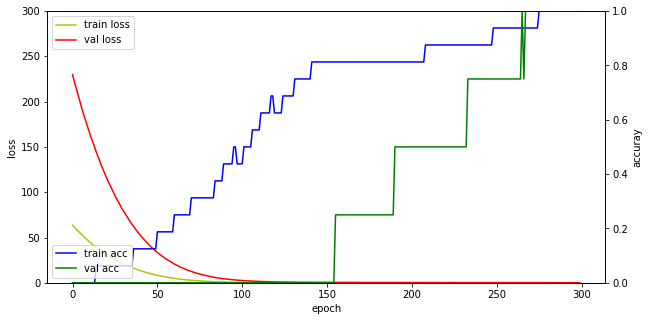

In [10]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 오차
loss_ax.set_ylim([0.0, 300.0]) # 값을 반영하여 변경, 왼쪽 y 축

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])    # 오른쪽 y 축

loss_ax.set_xlabel('epoch')    # x축 레이블
loss_ax.set_ylabel('loss')     # 오차 레이블, 왼쪽 y 축
acc_ax.set_ylabel('accuray')   # 정확도 레이블, 오른쪽 y 축

loss_ax.legend(loc='upper left') # 오차 레이블 출력 위치
acc_ax.legend(loc='lower left')  # 정확도 레입르 출력 위치

plt.show()

### 다층 퍼셉트론

In [11]:
# 두개의 은닉층을 사용하는 경우
model = Sequential()
print(type(model))
# 입력값: 1 개
# 출력 노드 갯수: 10개
# 활성화 함수: linear

# 첫번째 은닉층(입력층은 선언 안함)
model.add(Dense(10, input_dim=1, activation='linear'))  
# 두번째 은닉층(출력층)
model.add(Dense(1))  # 선형회귀는 알고리즘을 적용하지 않고 바로 출력
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_split=0.2, 
                 epochs=300, batch_size=1)

<class 'keras.engine.sequential.Sequential'>
Train on 16 samples, validate on 4 samples
Epoch 1/300
16/16 [==============================] - 0s 14ms/step - loss: 349.6591 - acc: 0.0000e+00 - val_loss: 1230.6221 - val_acc: 0.0000e+00
Epoch 2/300
16/16 [==============================] - 0s 1ms/step - loss: 322.8919 - acc: 0.0000e+00 - val_loss: 1119.5321 - val_acc: 0.0000e+00
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 291.1357 - acc: 0.0000e+00 - val_loss: 1028.9164 - val_acc: 0.0000e+00
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 266.2193 - acc: 0.0000e+00 - val_loss: 932.9840 - val_acc: 0.0000e+00
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 240.6926 - acc: 0.0000e+00 - val_loss: 843.6304 - val_acc: 0.0000e+00
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 217.8754 - acc: 0.0000e+00 - val_loss: 755.0598 - val_acc: 0.0000e+00
Epoch 7/300
16/16 [==============================]

Epoch 60/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4196 - acc: 0.5000 - val_loss: 0.9271 - val_acc: 0.0000e+00
Epoch 61/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4163 - acc: 0.5000 - val_loss: 0.8985 - val_acc: 0.0000e+00
Epoch 62/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4125 - acc: 0.5000 - val_loss: 0.9709 - val_acc: 0.0000e+00
Epoch 63/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4071 - acc: 0.5000 - val_loss: 0.9304 - val_acc: 0.0000e+00
Epoch 64/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4045 - acc: 0.5000 - val_loss: 0.9617 - val_acc: 0.0000e+00
Epoch 65/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4011 - acc: 0.5000 - val_loss: 0.9394 - val_acc: 0.0000e+00
Epoch 66/300
16/16 [==============================] - ETA: 0s - loss: 0.0254 - acc: 1.000 - 0s 1ms/step - loss: 0.3996 - acc: 0.5000 - val_loss: 0.8336 - val_acc: 0.0000e+00
Epoch 67/3

16/16 [==============================] - 0s 2ms/step - loss: 0.1897 - acc: 0.7500 - val_loss: 0.4033 - val_acc: 0.0000e+00
Epoch 120/300
16/16 [==============================] - 0s 2ms/step - loss: 0.1871 - acc: 0.7500 - val_loss: 0.3822 - val_acc: 0.2500
Epoch 121/300
16/16 [==============================] - 0s 2ms/step - loss: 0.1859 - acc: 0.7500 - val_loss: 0.4258 - val_acc: 0.0000e+00
Epoch 122/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1792 - acc: 0.7500 - val_loss: 0.3717 - val_acc: 0.2500
Epoch 123/300
16/16 [==============================] - 0s 2ms/step - loss: 0.1778 - acc: 0.7500 - val_loss: 0.3554 - val_acc: 0.2500
Epoch 124/300
16/16 [==============================] - 0s 2ms/step - loss: 0.1744 - acc: 0.7500 - val_loss: 0.4091 - val_acc: 0.0000e+00
Epoch 125/300
16/16 [==============================] - 0s 2ms/step - loss: 0.1706 - acc: 0.7500 - val_loss: 0.3784 - val_acc: 0.2500
Epoch 126/300
16/16 [==============================] - 0s 2ms/step - lo

16/16 [==============================] - 0s 2ms/step - loss: 0.0446 - acc: 1.0000 - val_loss: 0.0952 - val_acc: 1.0000
Epoch 181/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0435 - acc: 1.0000 - val_loss: 0.0895 - val_acc: 1.0000
Epoch 182/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0423 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 1.0000
Epoch 183/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0404 - acc: 1.0000 - val_loss: 0.0871 - val_acc: 1.0000
Epoch 184/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0393 - acc: 1.0000 - val_loss: 0.0896 - val_acc: 1.0000
Epoch 185/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0383 - acc: 1.0000 - val_loss: 0.0759 - val_acc: 1.0000
Epoch 186/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0376 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 1.0000
Epoch 187/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0359 -

16/16 [==============================] - 0s 2ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 242/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 243/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 244/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 245/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 246/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 247/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 248/300
16/16 [==============================] - 0s 2ms/step - loss: 0.0026 -

In [12]:
model.summary() # 가중치 20개 + bias 11개

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


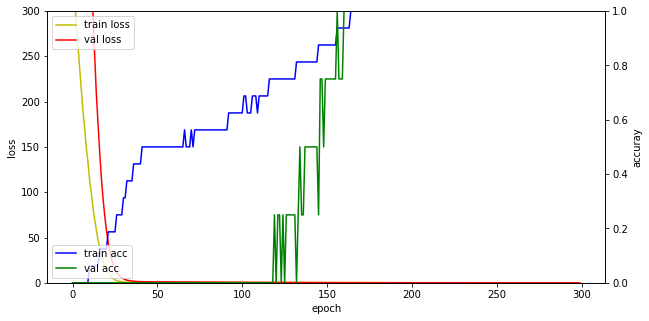

In [13]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 오차
loss_ax.set_ylim([0.0, 300.0]) # 값을 반영하여 변경, 왼쪽 y 축

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])    # 오른쪽 y 축

loss_ax.set_xlabel('epoch')    # x축 레이블
loss_ax.set_ylabel('loss')     # 오차 레이블, 왼쪽 y 축
acc_ax.set_ylabel('accuray')   # 정확도 레이블, 오른쪽 y 축

loss_ax.legend(loc='upper left') # 오차 레이블 출력 위치
acc_ax.legend(loc='lower left')  # 정확도 레입르 출력 위치

plt.show()

In [15]:
model.save('./Basic1.h5')

In [16]:
# 커널 restart

In [17]:
# 모델 사용
import numpy as np
from keras.models import load_model  # model 사용

model = load_model('./Basic1.h5')
x_use = np.array([51, 52, 53, 54, 55])
y_predict = model.predict(x_use) # 모델 사용, 예측값을 2차원 배열 형태 리턴
print(y_predict.shape)

y_use = np.array([102, 104, 106, 108, 110]) # 실제답
for i in range(len(x_use)):
    # print('실제값: {0}, 예측값: {1}'.format(y_use[i], y_predict[i][0]))
    print('실제값: {0}, 예측값: {1:.0f}'.format(y_use[i], y_predict[i][0]))

(5, 1)
실제값: 102, 예측값: 102
실제값: 104, 예측값: 104
실제값: 106, 예측값: 106
실제값: 108, 예측값: 108
실제값: 110, 예측값: 110


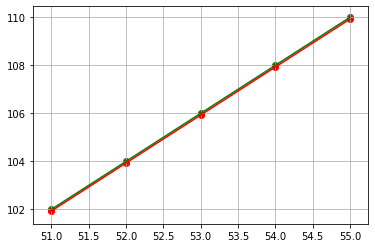

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(x_use, y_use, color='g')  # 실제값: 초록색
plt.plot(x_use, y_use, color='g')
plt.scatter(x_use, y_predict, color='r')  # 예측값: 빨간색
plt.plot(x_use, y_predict, color='r')
plt.grid(True)  # 그리드 출력
plt.show()